The representation graph offers a mathematical handle on YAML. These examples should help understanding the richness of such graph when using sequences, maps and nesting. It is a bipartite graph representing the document incidence structure.

* https://en.wikipedia.org/wiki/Levi_graph

In [1]:
import networkx as nx
import yaml

from src import nx_yaml

def load(stream):
    return yaml.compose(stream, Loader=nx_yaml.NxSafeLoader)

def dump(graph):
    return yaml.serialize(graph, Dumper=nx_yaml.NxSafeDumper)

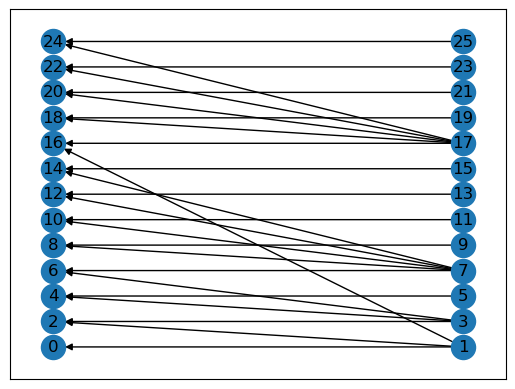

In [2]:
G0 = load("""
- a:
    b: c
    d: e
- {c, d}
""")
nodes = {n for n, b in G0.nodes(data="bipartite") if b == 0}
pos = nx.bipartite_layout(G0, nodes=nodes)
nx.draw_networkx(G0, pos=pos)

One of the simplest possible documents is one containing a single string. The encoding of this incidence requires two nodes: one for the root of the document and one for the scalar node, along with an attribute `value` for the actual string content.

{'bipartite': 0, 'kind': 'scalar', 'tag': None, 'value': 'this is a single scalar', 'start_mark': <yaml.error.Mark object at 0x7f4461663860>, 'end_mark': <yaml.error.Mark object at 0x7f43daf18ce0>, 'flow_style': None}


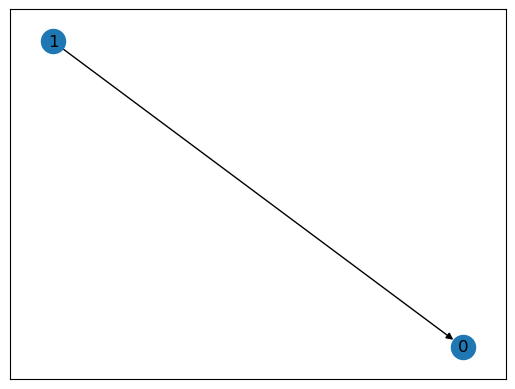

In [3]:
G1 = load("this is a single scalar")
print(G1.nodes[0])
nx.draw_networkx(G1)

In the case of mappings it is common to define the incidence of a string into another one.

mapping
two scalars
in a mapping


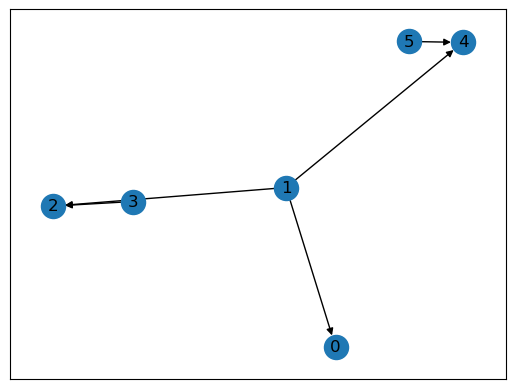

In [4]:
G2 = load("two scalars: in a mapping")
# the root is the mapping itself
print(G2.nodes[0]["kind"])
print(G2.nodes[2]["value"])
print(G2.nodes[4]["value"])
nx.draw_networkx(G2)

We also see strings incident into mappings or lists.

a
b
c


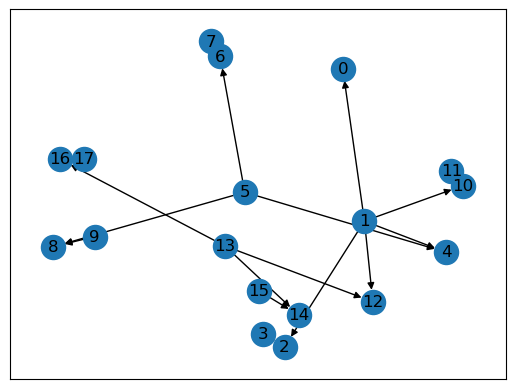

In [5]:
G3 = load("{a: {b: ""}, c: [d, e]}")
print(G3.nodes[2]["value"])
print(G3.nodes[6]["value"])
print(G3.nodes[10]["value"])
nx.draw_networkx(G3)

We can change the graph and dump it back to YAML. For example we can find and replace the empty scalar `""` with `null`.

In [6]:
G4 = G3.copy()
for n, d in G4.nodes(data=True):
    if d["bipartite"] == 0 and d["kind"] == "scalar" and d["value"] == "":
        d["value"] = "null"
print(dump(G4))

{a: {b: null}, c: [d, e]}

